<a href="https://colab.research.google.com/github/adalbertii/modele-NLP/blob/main/NLP_polish_english_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stackabuse.com/python-for-nlp-neural-machine-translation-with-seq2seq-in-keras/

http://www.manythings.org/anki/

https://nlp.stanford.edu/projects/glove/


In [1]:
import os, sys

from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [2]:
BATCH_SIZE = 64
EPOCHS = 20
LSTM_NODES =256
NUM_SENTENCES = 20000
MAX_SENTENCE_LENGTH = 50
MAX_NUM_WORDS = 20000
EMBEDDING_SIZE = 100

In [3]:
input_sentences = []
output_sentences = []
output_sentences_inputs = []

count = 0
for line in open(r'/content/drive/MyDrive/dane/pol.txt', encoding="utf-8"):
    count += 1

    if count > NUM_SENTENCES:
        break

    if '\t' not in line:
        continue

    input_sentence, output, _ = line.rstrip().split('\t')

    output_sentence = output + ' <eos>'
    output_sentence_input = '<sos> ' + output

    input_sentences.append(input_sentence)
    output_sentences.append(output_sentence)
    output_sentences_inputs.append(output_sentence_input)

print("num samples input:", len(input_sentences))
print("num samples output:", len(output_sentences))
print("num samples output input:", len(output_sentences_inputs))

num samples input: 20000
num samples output: 20000
num samples output input: 20000


In [4]:
print(input_sentences[172])
print(output_sentences[172])
print(output_sentences_inputs[172])

Hold it.
Trzymaj je. <eos>
<sos> Trzymaj je.


In [5]:
input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)



In [ ]:
input_integer_seq

In [6]:
word2idx_inputs = input_tokenizer.word_index
#word2idx_inputs

In [7]:
print('Total unique words in the input: %s' % len(word2idx_inputs))



Total unique words in the input: 4587


In [8]:
max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)

Length of longest sentence in input: 7


In [9]:
output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences_inputs)

word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

Total unique words in the output: 13446
Length of longest sentence in the output: 11


In [10]:
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences.shape:", encoder_input_sequences.shape)
print("encoder_input_sequences[172]:", encoder_input_sequences[172])

encoder_input_sequences.shape: (20000, 7)
encoder_input_sequences[172]: [  0   0   0   0   0 351   7]


In [11]:
print(word2idx_inputs["i'm"])
print(word2idx_inputs["ill"])

12
644


In [12]:
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_input_sequences.shape)
print("decoder_input_sequences[172]:", decoder_input_sequences[172])

decoder_input_sequences.shape: (20000, 11)
decoder_input_sequences[172]: [  2 277 214   0   0   0   0   0   0   0   0]


In [13]:
print(word2idx_outputs["<sos>"])
print(word2idx_outputs["trzymaj"])
print(word2idx_outputs["je"])

2
277
343


In [12]:
ss="Wojciech michalski 60".split()
ss

['Wojciech', 'michalski', '60']

In [13]:
ss[1:]

['michalski', '60']

In [14]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open(r'/content/drive/MyDrive/dane/LLM/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [15]:
num_words = min(MAX_NUM_WORDS, len(word2idx_inputs) + 1)
embedding_matrix = zeros((num_words, EMBEDDING_SIZE))
for word, index in word2idx_inputs.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [16]:
print(embeddings_dictionary["ill"])

[ 0.12648    0.1366     0.22192   -0.025204  -0.7197     0.66147
  0.48509    0.057223   0.13829   -0.26375   -0.23647    0.74349
  0.46737   -0.462      0.20031   -0.26302    0.093948  -0.61756
 -0.28213    0.1353     0.28213    0.21813    0.16418    0.22547
 -0.98945    0.29624   -0.62476   -0.29535    0.21534    0.92274
  0.38388    0.55744   -0.14628   -0.15674   -0.51941    0.25629
 -0.0079678  0.12998   -0.029192   0.20868   -0.55127    0.075353
  0.44746   -0.71046    0.75562    0.010378   0.095229   0.16673
  0.22073   -0.46562   -0.10199   -0.80386    0.45162    0.45183
  0.19869   -1.6571     0.7584    -0.40298    0.82426   -0.386
  0.0039546  0.61318    0.02701   -0.3308    -0.095652  -0.082164
  0.7858     0.13394   -0.32715   -0.31371   -0.20247   -0.73001
 -0.49343    0.56445    0.61038    0.36777   -0.070182   0.44859
 -0.61774   -0.18849    0.65592    0.44797   -0.10469    0.62512
 -1.9474    -0.60622    0.073874   0.50013   -1.1278    -0.42066
 -0.37322   -0.50538    0

In [17]:
print(embedding_matrix[539])

[-0.31867999  0.10495     0.36320999 -0.537       0.34586     1.02400005
 -0.10644     0.12927     0.052443    0.16226     0.70736003  0.14661001
  0.60824001  0.71399999 -0.14806999  0.33136001 -0.12283     0.25349
 -0.60635    -0.65362     0.58899999  0.57991999  0.23824    -0.49928999
  0.62026    -0.39816999 -0.1042     -0.19722     0.093341    0.40364999
  0.41922    -0.055124    0.32178     0.10953     0.53929001  0.27083001
  0.014205    0.68540001  0.41473001 -0.2423     -0.1516     -0.35455
  0.094878    0.015852    0.26848999  0.0074604  -0.41396001  0.86791003
  0.14038    -0.40163001  0.47218001  0.45646    -0.22318     1.26750004
 -0.05444    -2.54959989 -0.50904    -0.26655     1.6358      0.34545001
 -0.32031     1.19309998  0.31474     0.49950001  0.46445     0.38668001
  0.71376002 -0.37740999 -0.52855003  0.20543     0.41097    -0.11162
  0.6961     -0.40213999  0.31118     0.24104001  0.3197     -0.31672001
 -0.10723     0.62029999  0.63533998  0.43415999 -0.815     

In [18]:
embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=max_input_len)

In [19]:
decoder_targets_one_hot = np.zeros((
        len(input_sentences),
        max_out_len,
        num_words_output
    ),
    dtype='float32'
)

In [20]:
decoder_targets_one_hot.shape

(20000, 11, 13447)

In [ ]:
for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [21]:
encoder_inputs_placeholder = Input(shape=(max_input_len,))
x = embedding_layer(encoder_inputs_placeholder)
encoder = LSTM(LSTM_NODES, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [22]:
decoder_inputs_placeholder = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

In [23]:
decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [24]:
model = Model([encoder_inputs_placeholder,
  decoder_inputs_placeholder], decoder_outputs)
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

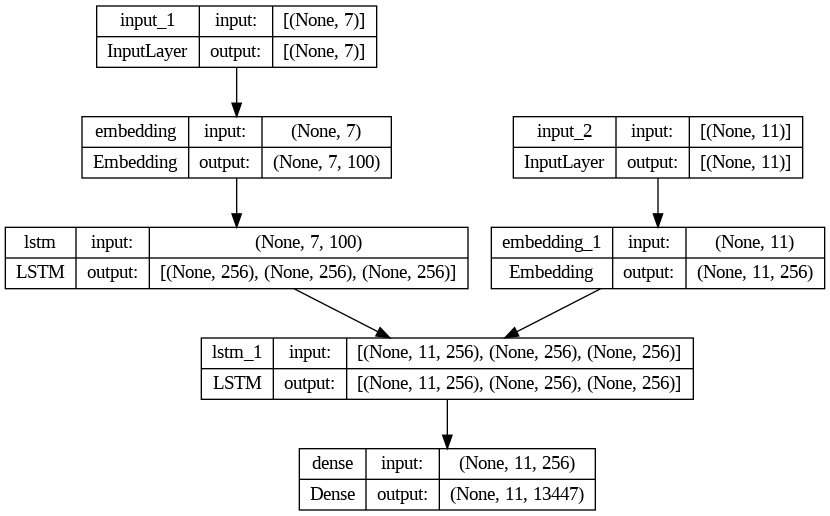

In [25]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [1]:
r = model.fit(
    [encoder_input_sequences, decoder_input_sequences],
    decoder_targets_one_hot,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.1,
)

NameError: name 'model' is not defined

In [ ]:
encoder_model = Model(encoder_inputs_placeholder, encoder_states)

In [ ]:
decoder_state_input_h = Input(shape=(LSTM_NODES,))
decoder_state_input_c = Input(shape=(LSTM_NODES,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

In [ ]:
decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

In [ ]:
decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)

In [ ]:
decoder_states = [h, c]
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)

In [ ]:
from keras.utils import plot_model
plot_model(decoder_model, to_file='model_plot_dec.png', show_shapes=True, show_layer_names=True)

In [ ]:
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

In [ ]:
def translate_sentence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']
    eos = word2idx_outputs['<eos>']
    output_sentence = []

    for _ in range(max_out_len):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [ ]:
i = np.random.choice(len(input_sentences))
input_seq = encoder_input_sequences[i:i+1]
translation = translate_sentence(input_seq)
print('-')
print('Input:', input_sentences[i])
print('Response:', translation)